In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
loan_data=pd.read_csv("/content/loan_data.csv")

In [3]:
X=loan_data.drop(columns='not.fully.paid')
Y=loan_data['not.fully.paid']

In [4]:
categorical_columns=['purpose']
column_transformer=ColumnTransformer(transformers=[('cat',OneHotEncoder(drop='first'),categorical_columns)],
                                     remainder='passthrough')

In [5]:
# Apply the transformations to the features
X=column_transformer.fit_transform(X)

In [7]:
#Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
# Step 5: Fit the Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
# Step 6: Predicting the test set results
Y_pred = classifier.predict(X_test)
# Print the predicted values
print("Predicted values (1 means not fully paid, 0 means fully paid):")
print(Y_pred)

# Print a boolean array where each element is True if the corresponding prediction is 1
print("Boolean array indicating if the loan is not fully paid (True means not fully paid):")
print(Y_pred == 1)

Predicted values (1 means not fully paid, 0 means fully paid):
[0 0 0 ... 0 0 0]
Boolean array indicating if the loan is not fully paid (True means not fully paid):
[False False False ... False False False]


In [11]:
# Step 7: Calculating the accuracy metrics
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

In [12]:
# Output the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7364300626304802
Confusion Matrix:
[[1348  267]
 [ 238   63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1615
           1       0.19      0.21      0.20       301

    accuracy                           0.74      1916
   macro avg       0.52      0.52      0.52      1916
weighted avg       0.75      0.74      0.74      1916



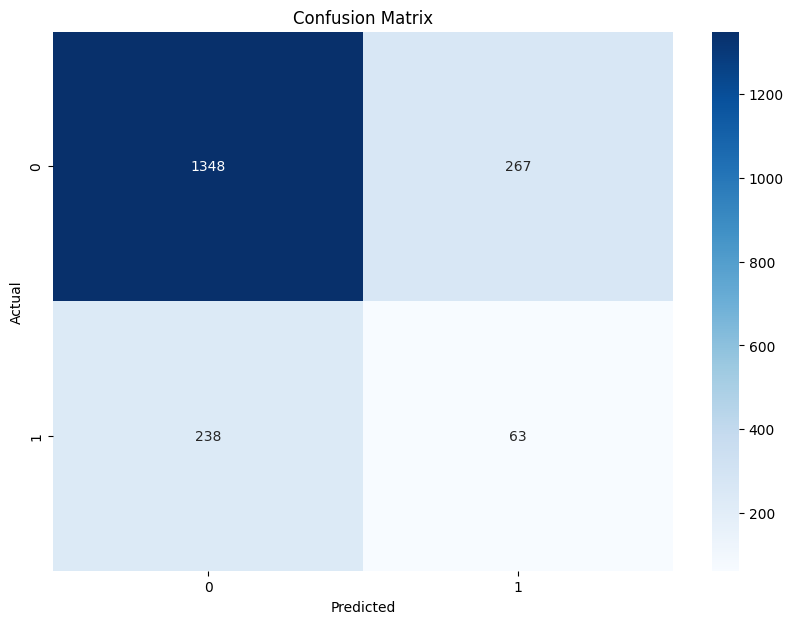

In [13]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()